In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

## 1. Introduction:
A census is the procedure of systematically acquiring and recording information about the members of a given population. The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

## 1.1 Data description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.

# 1.2 Features Description

# 1.2.1 Categorical Attributes

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. (Individual work category)

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. (Individual's highest education degree)

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. (Individual marital status)

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. (Individual's occupation)

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. (Individual's relation in a family)

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. (Race of Individual)

sex: Female, Male.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. (Individual's native country)

# 1.2.2 Continuous Attributes

age: continuous. (Age of an individual)

education-num: number of education year, continuous. (Individual's year of receiving education)

fnlwgt: final weight, continuous. (The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.)

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous. (Individual's working hour per week)

## Reading the data

In [2]:
df = pd.read_csv("adult.csv")
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## handle missing value and subtitute best fit
The first step to analyse any dataset is to clean and prepare the data. Some of the steps involved are

    . Handling missing values.
    . Format existing data to make it meaningful for plotting.
    . Try to create new columns using existing columns.

In [3]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

But if we look closely, the nan values are represented in the form of '?'. So we must check for '?' in the dataset.

In [4]:
df.age.unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86], dtype=int64)

In [5]:
df.isin(["?"]).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [6]:
print(df.workclass.unique())
print("\n",' # '*30)

df['workclass'].replace('?', 'other', inplace = True)
df.workclass.unique()

['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  # 


array(['Private', 'Local-gov', 'other', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

We can replace the nan values present in the work class feature using a new categorial varialbe 'other'

In [7]:
print(df.occupation.unique())
print("\n",' # '*30)

df['occupation'].replace('?', 'Other-service', inplace = True)
df.occupation.unique()

['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']

  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  # 


array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

We can replace the nan values present in the Occupation feature using a new categorial varialbe 'Other-service'

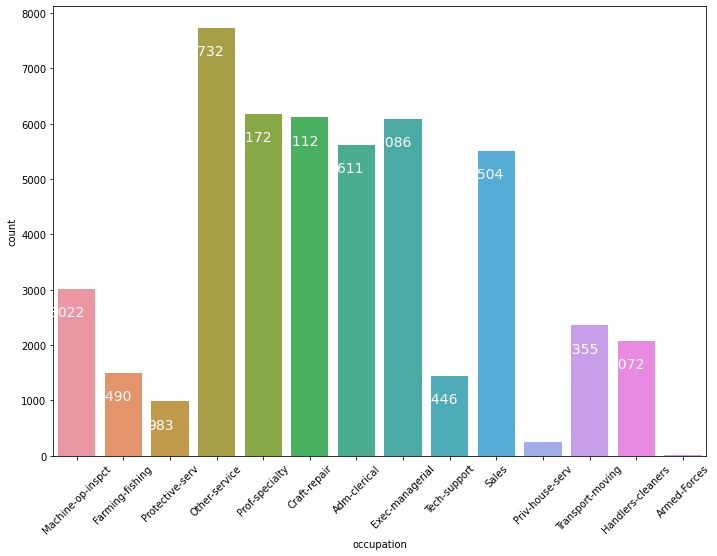

In [8]:
#unique value count of Occupation
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
ax = sns.countplot(x='occupation', data = df)
_ = plt.xticks(rotation = 45,
              horizontalalignment = 'center', fontweight = 'light') # formatting the x-axis
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)

In [9]:
print(df['native-country'].unique())
print("\n",' # '*30)
print(df['native-country'].value_counts())
print("\n",' # '*30)
df['native-country'].replace('?', 'Other', inplace = True)
df['native-country'].unique()

['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']

  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  # 
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South 

array(['United-States', 'Other', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

We can replace the nan values present in the native country feature using a new categorial varialbe 'Other'

In [10]:
pd.set_option('display.max_columns', None)
c = " # "*30
for name in df.columns:
    print(f"\n {c}\n {name} value count \n {df[name].value_counts()}")


  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  # 
 age value count 
 36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  # 
 workclass value count 
 Private             33906
Self-emp-not-inc     3862
Local-gov            3136
other                2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  # 
 fnlwgt value count 
 203488    21
190290    19
120277    19
125892    18
126569    18
          ..
82649      1
193304     1
227689     1
135891     1
250034     1
Name: fnlwgt, Length: 28523, dtype: int64

  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #

Now here we can check all unique have valid numeric and categrical value

In [11]:
# replacing the classes relevant as Dropout

df['education'].replace(['11th', '10th', '7th-8th','5th-6th',
                              '9th', '12th', '1st-4th', 'Preschool'], 'Dropout', inplace = True)

# replacing HS-grad to HighSchool Graduate

df['education'].replace(['HS-grad'], 'HighSchool Graduate', inplace = True)

# 'Assoc-acdm', 'Some-college', 'Assoc-voc' to 'Community College'

df['education'].replace(['Assoc-acdm', 'Some-college', 'Assoc-voc'], 
                             'Community College', inplace = True)

# replacing 'Prof-school' to 'Masters'

df['education'].replace('Prof-school', 'Masters', inplace = True)

We can combine all the relevant education groups to a single group using the replace method.

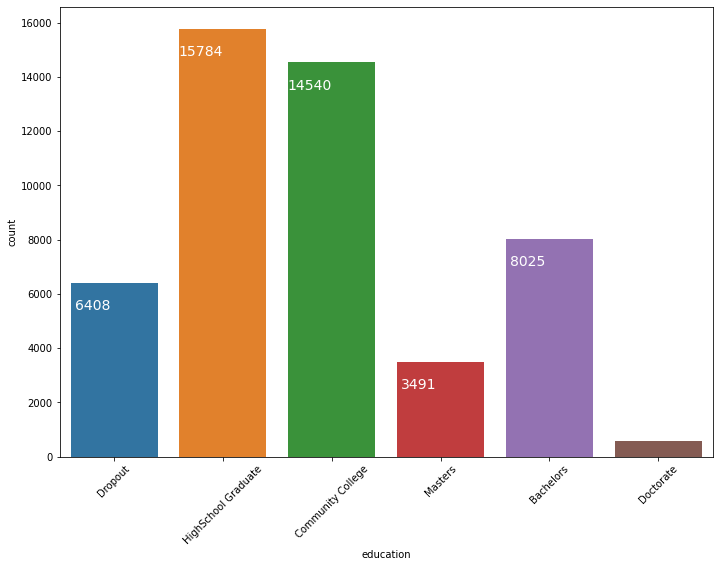

In [12]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
ax = sns.countplot(x='education', data = df)
_ = plt.xticks(rotation = 45,
              horizontalalignment = 'center', fontweight = 'light') # formatting the x-axis
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)

In [13]:
# material status 
# material status for married
df['marital-status'].replace(['Married-civ-spouse', 'Married-spouse-absen', 'Married-AF-spouse'], 'Married', inplace = True)

# material for unmarried

df['marital-status'].replace(['Never-married'], 'Unmarried', inplace = True)

# material status for divorced 
df['marital-status'].replace(['Separated'], 'Divorced', inplace = True)

We can combine all the relevant material status to a single group using the replace method.

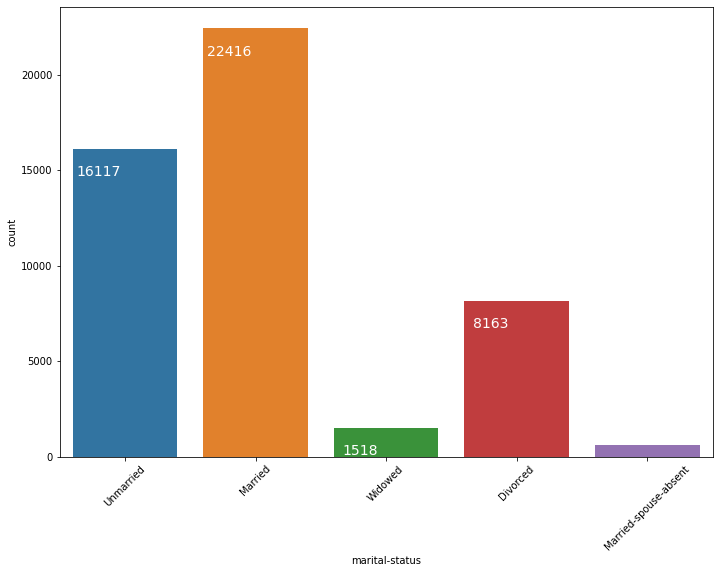

In [14]:
# unique value in material status
rcParams['figure.figsize'] = 11.7,8.27
ax = sns.countplot(x='marital-status', data = df)
_ = plt.xticks(rotation = 45,
              horizontalalignment = 'center', fontweight = 'light') # formatting the x-axis
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)

In [15]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,Dropout,7,Unmarried,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HighSchool Graduate,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Community College,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Community College,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,other,103497,Community College,10,Unmarried,Other-service,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,Dropout,6,Unmarried,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,other,227026,HighSchool Graduate,9,Unmarried,Other-service,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Masters,15,Married,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Community College,10,Unmarried,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,Dropout,4,Married,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## Univariate & Bivariate Analysis

In [16]:
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True,
             font_scale = 0.85)

### Age
We can check the distribution of the age column with respect to the two values present in the Income column (target).

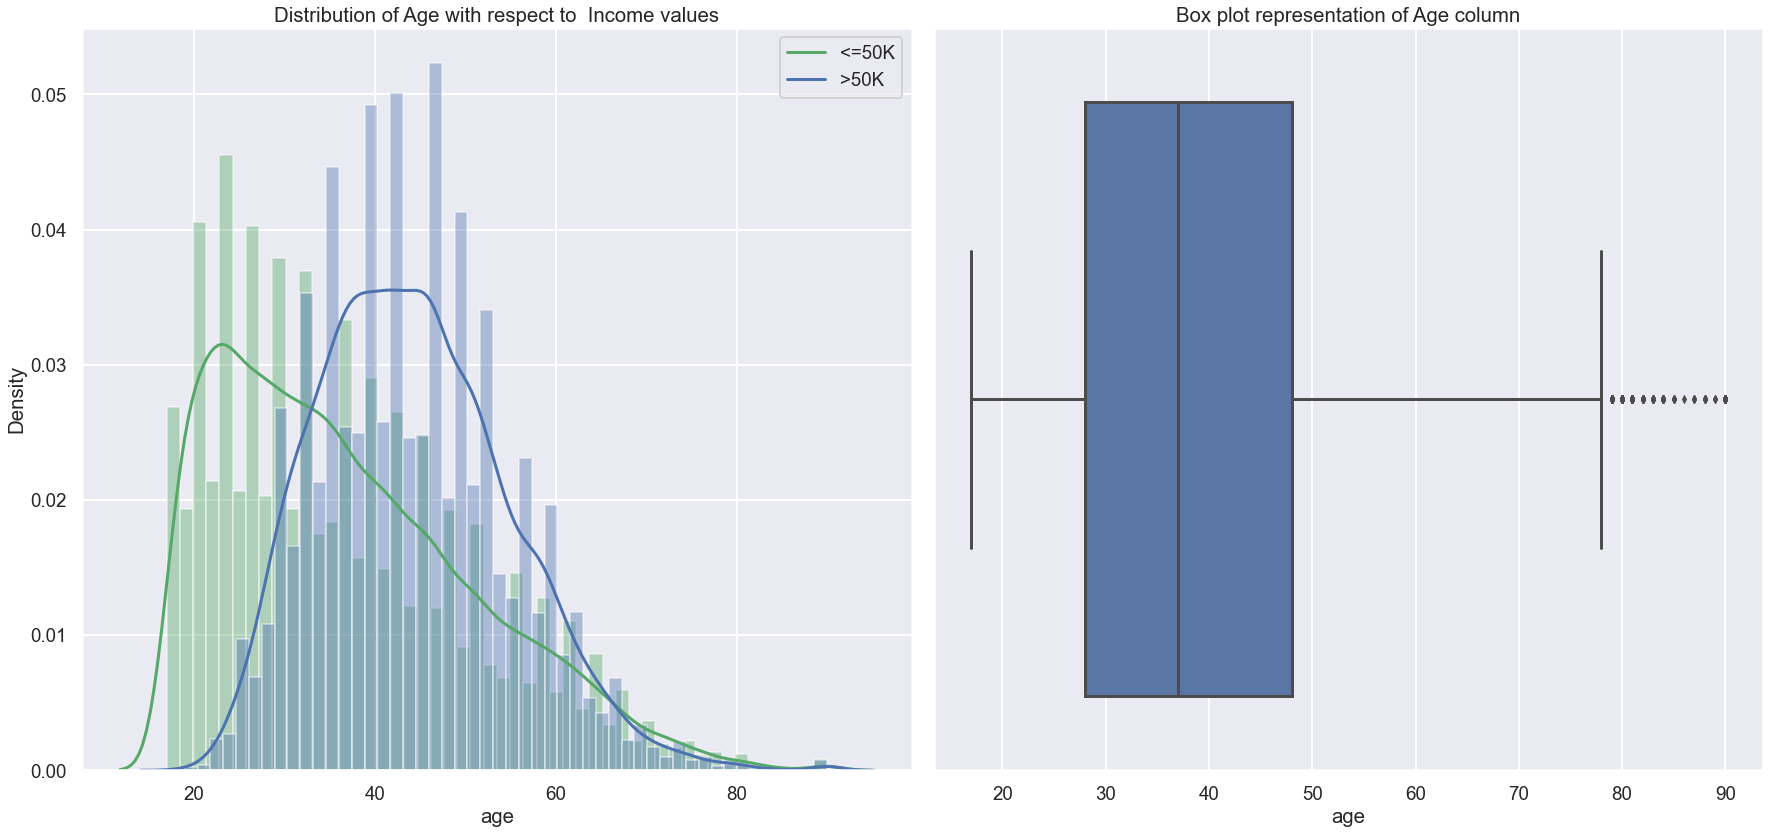

In [17]:
plt.figure(figsize = (25, 12))


ax1 = plt.subplot(121) # subplot on row - 1 coloum - 1

# distplot for income values <= 50K
sns.distplot(df[df['income'] == '<=50K']['age'], color = 'g')
# distplot for income values > 50K
sns.distplot(df[df['income'] == '>50K']['age'], color = 'b')

plt.legend(['<=50K', '>50K'])

plt.title('Distribution of Age with respect to  Income values') # title of the plot

plt.tight_layout()

ax2 = plt.subplot(122) # subplot on row - 1 coloum - 2

sns.boxplot(df['age']) # boxplot of the Age column

plt.title('Box plot representation of Age column')  # title of the plot

plt.tight_layout()

## Observations:

### Plot 1:

    > Here we can see that more number of adults between the age of 20 to 30 earn less than 50K. This might be because of their less experience.

    > Adults between the age of 35 to 55 earn more than 50K. This might be because of their high experience.

### Plot 2:

    > Here we can see that there some outliers in the Age column that must be removed so it doesn't affect our analysis.

In [18]:
def Zscore_outlier(df):
    outliers = []
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            outliers.append(i)
    return outliers

age_outliers = Zscore_outlier(df['age'])
duplicate_dict={} # a dictionary to store each of them.
for i in age_outliers:#loop through them.
    duplicate_dict[i]=age_outliers.count(i)
print('\n', duplicate_dict)

"""### this are outlier of age at upper limit
"""


 {80: 38, 90: 55, 81: 37, 82: 15, 83: 11, 85: 5, 84: 13, 89: 2, 88: 6, 87: 3, 86: 1}


'### this are outlier of age at upper limit\n'

### Fnlwgt:

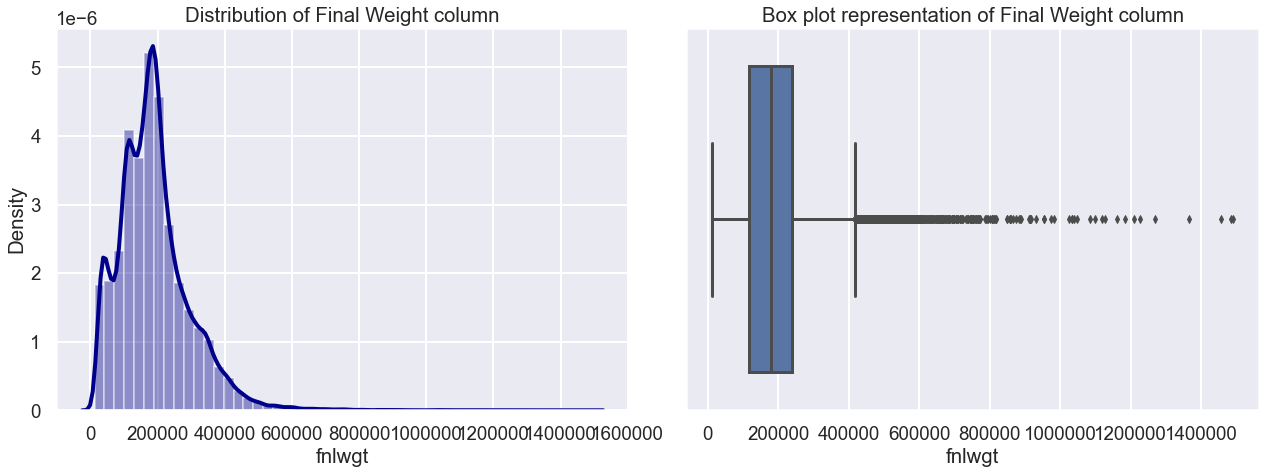

In [19]:
plt.figure(figsize = (18, 7))

ax1 = plt.subplot(121) # subplot on row - 1 coloum - 1

# distplot of Final Weight
sns.distplot(df['fnlwgt'], color = 'darkblue',kde_kws = {'linewidth' : 4})
             
plt.ticklabel_format(style = 'plain', axis ='x') # printiing the x-label normally 
plt.title('Distribution of Final Weight column') # title of the plot
plt.tight_layout()

ax2 = plt.subplot(122) # subplot on row - 1 coloum - 2

sns.boxplot(df['fnlwgt']) # boxplot of Final Weight
plt.ticklabel_format(style = 'plain', axis ='x') # printiing the x-label normally 
plt.title('Box plot representation of Final Weight column') # title of the plot
plt.tight_layout()

## Observations:

### Plot 1:

    > Here we can see that there more number of adults concerntrated around category of 200000.
    > From 200000 the number of people in each category are decreasing.
### Plot 2:

    > There are more number of outliers which can be observed from the plot.

In [20]:
fl_weight_outliers = Zscore_outlier(df['fnlwgt'])
print(len(fl_weight_outliers))

506


## educational-num: 

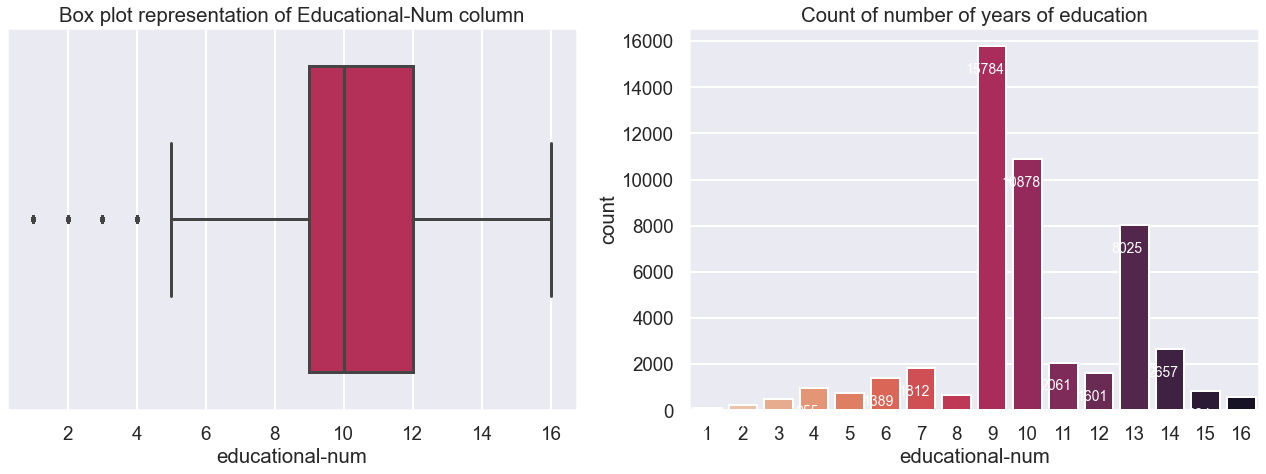

In [21]:
plt.figure(figsize = (18, 7))

ax1 = plt.subplot(121) # subplot on row - 1 coloum - 1

# countplot of the number of years of education
sns.boxplot(df['educational-num'],  palette = 'rocket_r') # boxplot of the Age column
plt.title('Box plot representation of Educational-Num column')  # title of the plot
plt.tight_layout()

ax2 = plt.subplot(122) # subplot on row - 1 coloum - 2

ax = sns.countplot(df['educational-num'], palette = 'rocket_r')
plt.title('Count of number of years of education') # title of the plot
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)
plt.tight_layout()

## Observations:

### Plot 1:

    >Here we can see that majority of the adults an education period of 9+ years.
### Plot 2:

    >Here we can see that there are outliers present in the lower quantile of the plot. It must be treated before our analysis.

## hours-per-week

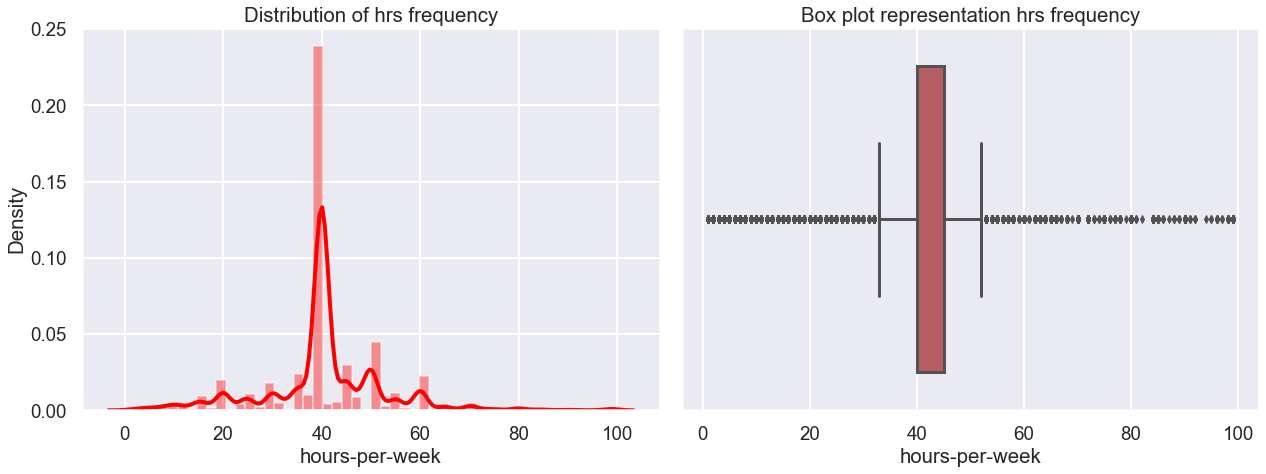

In [22]:
plt.figure(figsize = (18, 7))

ax1 = plt.subplot(121) # subplot on row - 1 coloum - 1

# distplot for income values <= 50K
sns.distplot(df['hours-per-week'], color = 'red',
             kde_kws = {'linewidth' : 4})
plt.title('Distribution of hrs frequency') # title of the plot
plt.tight_layout()

ax2 = plt.subplot(122) # subplot on row - 1 coloum - 2

sns.boxplot(df['hours-per-week'],color = 'r') # boxplot of the Age column
plt.title('Box plot representation hrs frequency')  # title of the plot
plt.tight_layout()

## Observations:

### Plot 1:

    >Here we can see that majority of the adults work for 40 to 50 hours a week.
### Plot 2:

    > Here we can see that there are outliers present in the lower quantile and upper quantile of the plot. It must be treated before our analysis.

## work-class:

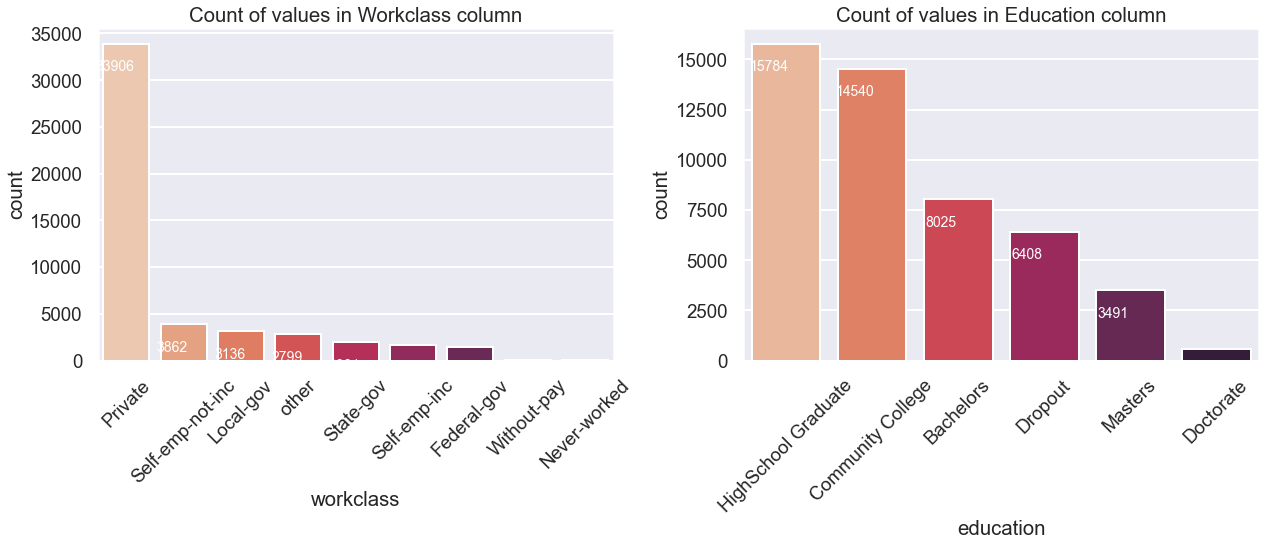

In [23]:
plt.figure(figsize = (18, 8))

ax1 = plt.subplot(121) # subplot on row - 1 coloum - 1

# countplot of Workclass column
ax= sns.countplot(df['workclass'],  order = df['workclass'].value_counts().index,palette = 'rocket_r')
              
_ = plt.xticks(rotation = 45,
              horizontalalignment = 'center', fontweight = 'light') # formatting the x-axis
plt.title('Count of values in Workclass column') # title of the plot
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)
plt.tight_layout()

ax2 = plt.subplot(122) # subplot on row - 1 coloum - 2

# countplot of the number of years of education
ax = sns.countplot(df['education'], order = df['education'].value_counts().index,
                                 palette = 'rocket_r') 
_ = plt.xticks(rotation = 45,
              horizontalalignment = 'center', fontweight = 'light') # formatting the x-axis
plt.title('Count of values in Education column')  # title of the plot
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)
plt.tight_layout()

## Observations:

### Plot 1:

    >Here we can see that most of the adults in the dataset are private employees.
### Plot 2:

    >Here we can see that most of the adults have a degree to their name and there are very few number of dropouts.

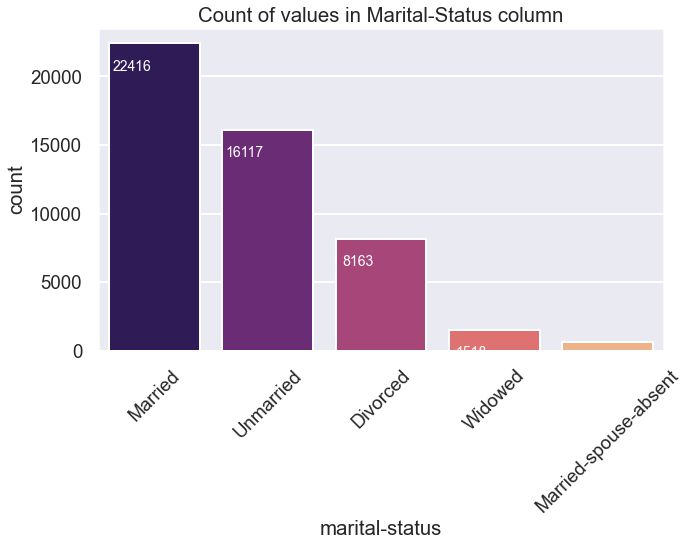

In [24]:
plt.figure(figsize = (10, 8))


# countplot of Workclass column
ax = sns.countplot(df['marital-status'],  order = df['marital-status'].value_counts().index,
              palette = 'magma')
_ = plt.xticks(rotation = 45,
              horizontalalignment = 'center', fontweight = 'light') # formatting the x-axis
plt.title('Count of values in Marital-Status column') # title of the plot
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)
plt.tight_layout()

### Here we can see that most of the adults in the dataset are marri

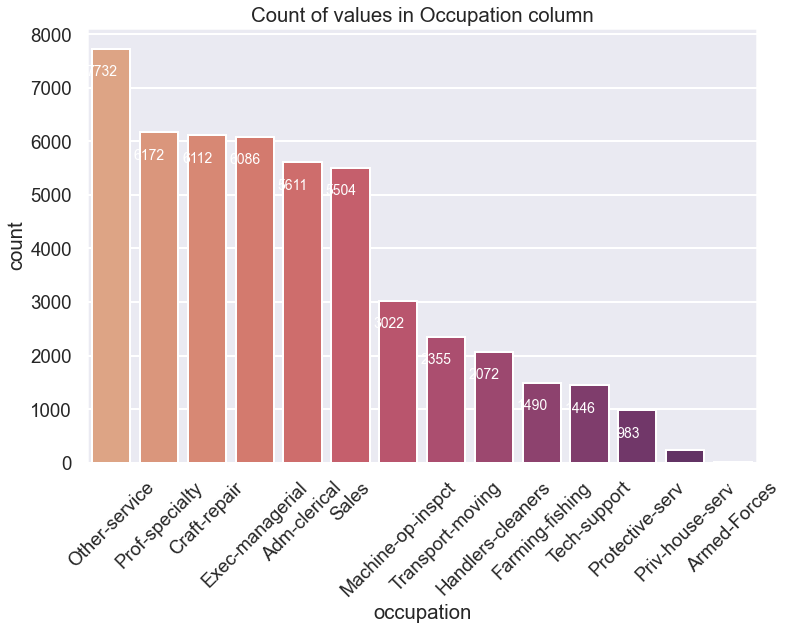

In [25]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(df['occupation'], order = df['occupation'].value_counts().index,
                                 palette = 'flare') 
_ = plt.xticks(rotation = 45,
              horizontalalignment = 'center', fontweight = 'light') # formatting the x-axis
plt.title('Count of values in Occupation column')  # title of the plot
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)

### Prof-specialty, Craft-repair, Exec-managerial etc are some of the jobs with higher number of employees.

# Race, Gender and Relationship

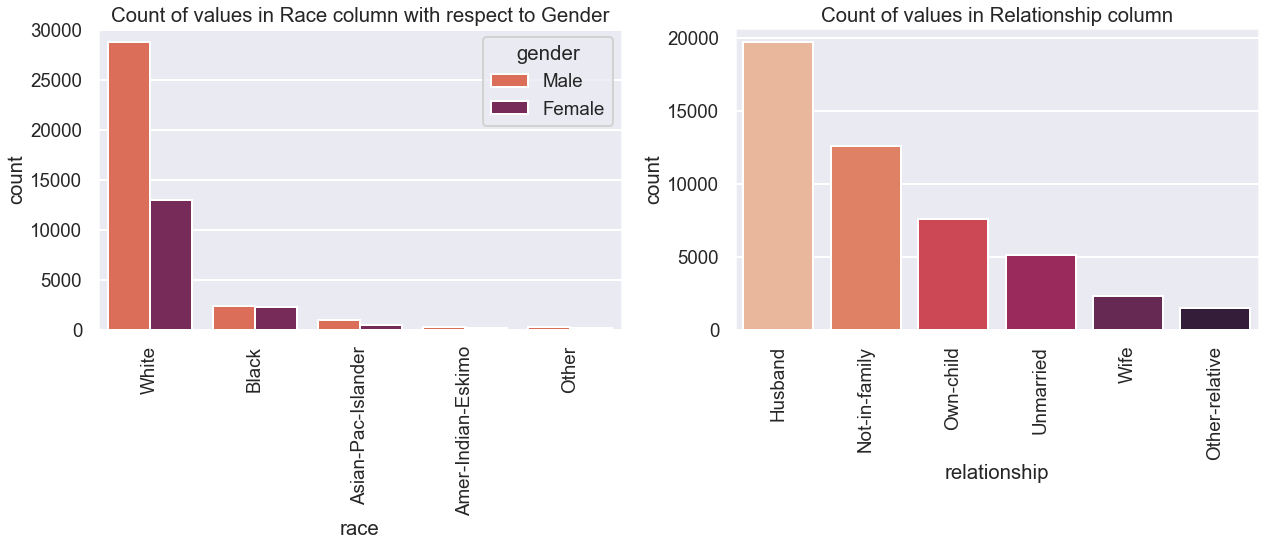

In [26]:
plt.figure(figsize = (18, 8))

ax1 = plt.subplot(121) # subplot on row - 1 coloum - 1

# countplot of Workclass column
sns.countplot(df['race'],  order = df['race'].value_counts().index,
              palette = 'rocket_r', hue = df['gender'])
_ = plt.xticks(rotation = 90,
              horizontalalignment = 'center', fontweight = 'light') # formatting the x-axis
plt.title('Count of values in Race column with respect to Gender') # title of the plot
plt.tight_layout()

ax2 = plt.subplot(122) # subplot on row - 1 coloum - 2

# countplot of the number of years of education
sns.countplot(df['relationship'], order = df['relationship'].value_counts().index,
                                 palette = 'rocket_r') 
_ = plt.xticks(rotation = 90,
              horizontalalignment = 'center', fontweight = 'light') # formatting the x-axis
plt.title('Count of values in Relationship column')  # title of the plot
plt.tight_layout()

## Observations:


#### Here we can see that when it comes to race and gender there are majority of white male and females than any other race.

#### Here we can see that majority of the working adults are husbands.

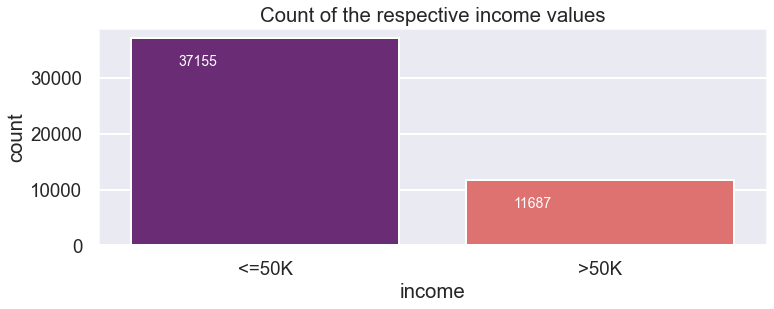

In [27]:
plt.figure(figsize = (12, 4))

# countplot of the number of years of education
ax = sns.countplot(df['income'], palette = 'magma')
plt.title('Count of the respective income values')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)
plt.show()

# Age and Income

In [28]:
age_range = pd.cut(df['age'], 20) # seperating age into 20 bins
age_range

0          (24.3, 27.95]
1          (35.25, 38.9]
2          (27.95, 31.6]
3          (42.55, 46.2]
4        (16.927, 20.65]
              ...       
48837      (24.3, 27.95]
48838      (38.9, 42.55]
48839      (57.15, 60.8]
48840      (20.65, 24.3]
48841      (49.85, 53.5]
Name: age, Length: 48842, dtype: category
Categories (20, interval[float64]): [(16.927, 20.65] < (20.65, 24.3] < (24.3, 27.95] < (27.95, 31.6] ... (75.4, 79.05] < (79.05, 82.7] < (82.7, 86.35] < (86.35, 90.0]]

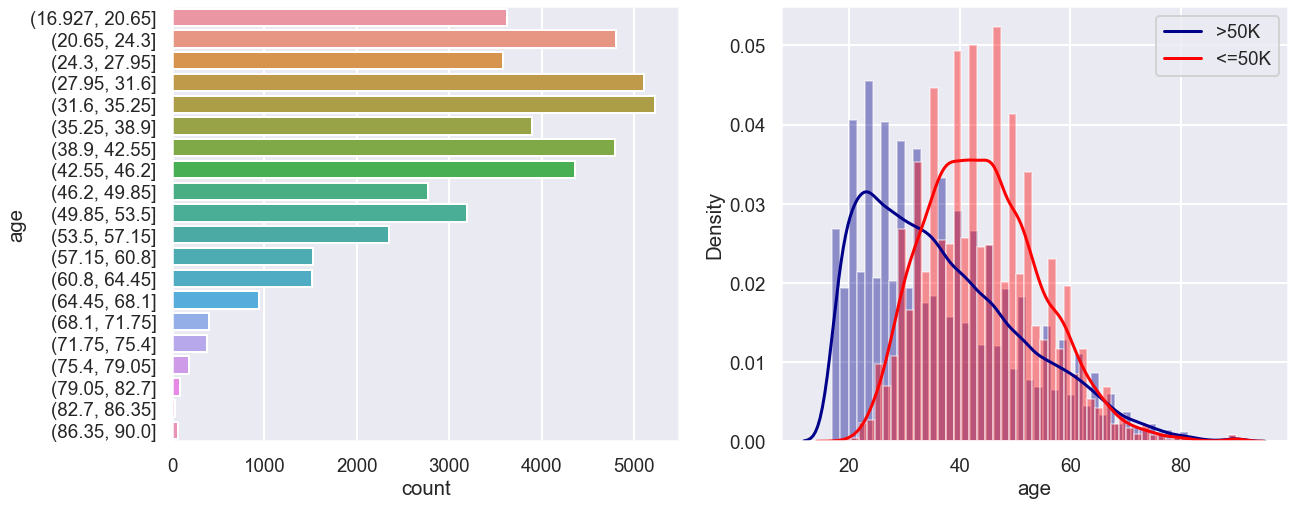

In [29]:
fig = plt.figure(figsize=(20,8)) # setting the figure size

plt.subplot(1, 2, 1) # plot on row-1, column-1
sns.countplot(y=age_range) # countplot on the binned age

plt.subplot(1, 2, 2) # plot on row-1, column-2
# distplot for income values <= 50K
sns.distplot(df[df['income'] == '<=50K']['age'], color = 'darkblue')
# distplot for income values > 50K
sns.distplot(df[df['income'] == '>50K']['age'], color = 'red')
plt.legend(['>50K', '<=50K'])

In [30]:
df.groupby('income')['age'].agg(np.median).reset_index()

,income,age
0,<=50K,34
1,>50K,43


## Observations:

#### Here we can see that there are more number of workers between the age of 27 and 35.
#### Workers below the age of 40 earn less compared to workers above the age of 40.

In [31]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,Dropout,7,Unmarried,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HighSchool Graduate,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Community College,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Community College,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,other,103497,Community College,10,Unmarried,Other-service,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,Dropout,6,Unmarried,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,other,227026,HighSchool Graduate,9,Unmarried,Other-service,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Masters,15,Married,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Community College,10,Unmarried,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,Dropout,4,Married,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


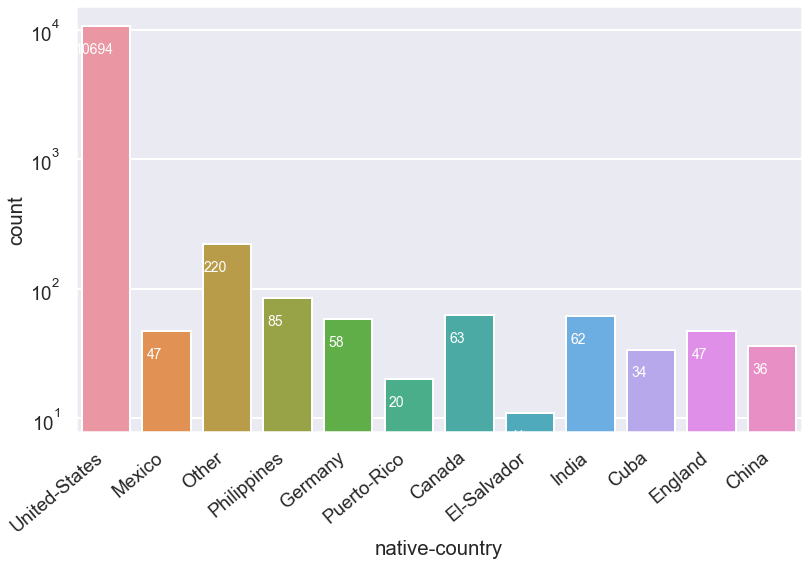

In [32]:
ax = sns.countplot(x='native-country', data = df[(df.income > "<=50K") ],order=df['native-country'].value_counts().iloc[:12].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)
ax.set(yscale = 'log');
plt.tight_layout()

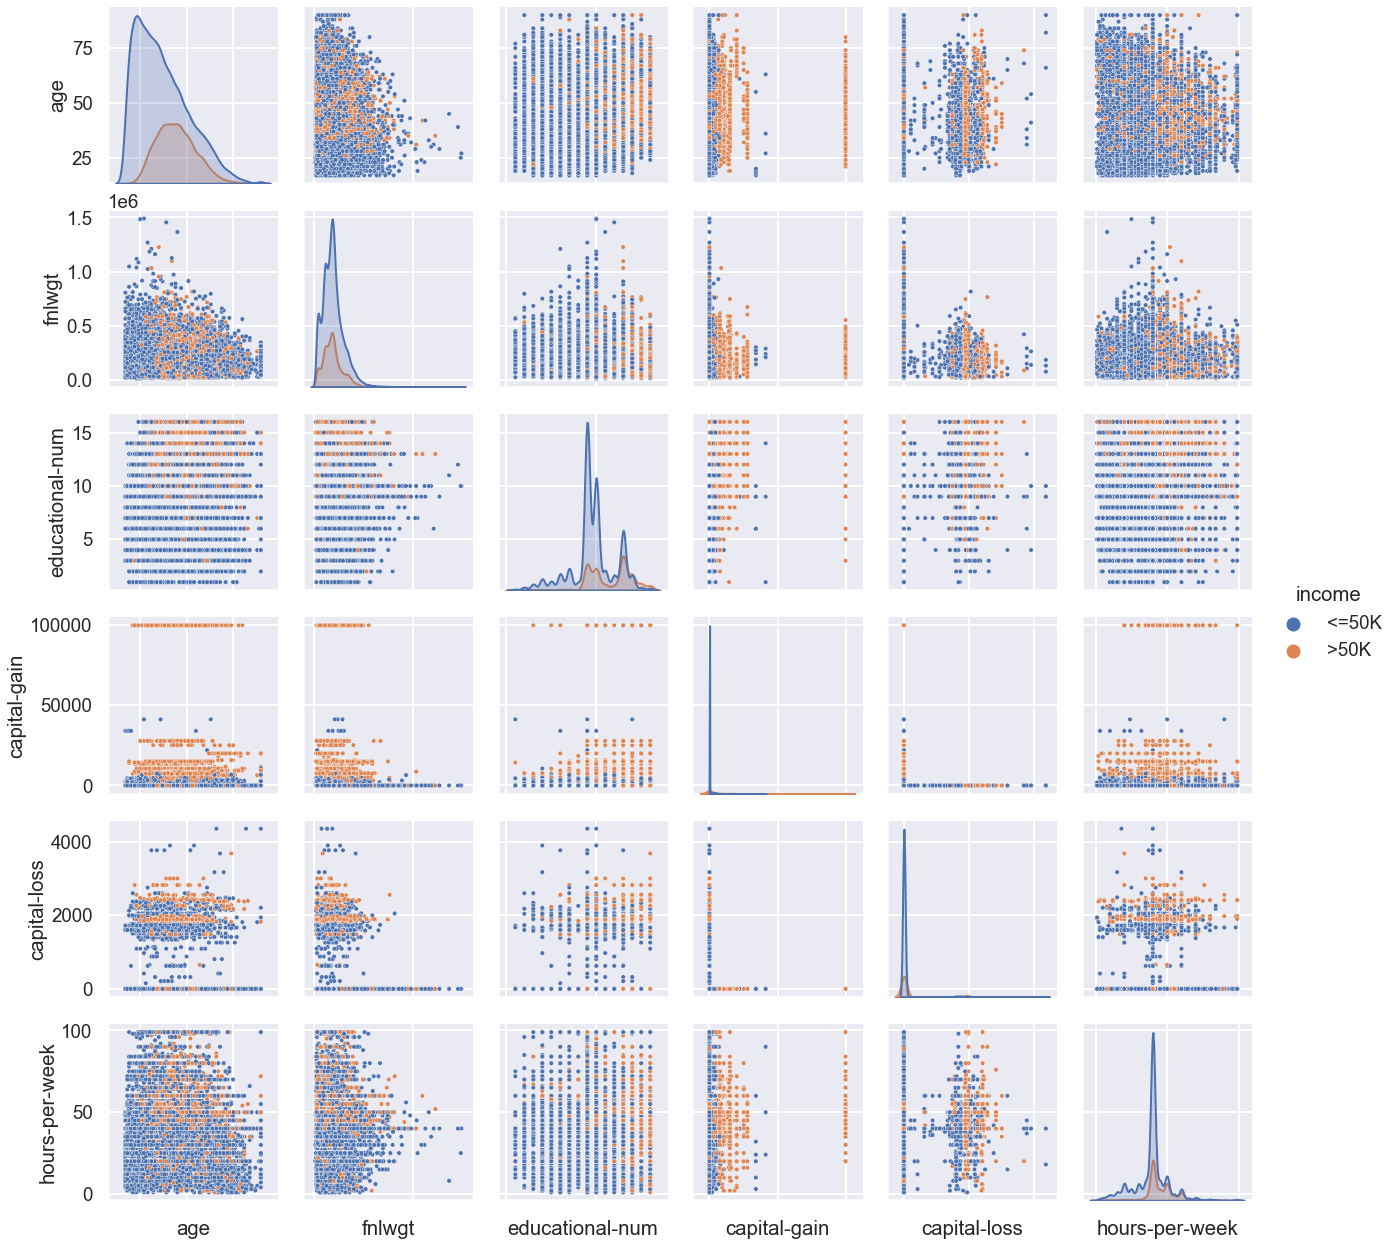

In [33]:
# pairplot
pp = sns.pairplot(df, hue = 'income', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

# Occupation Vs Age Vs Income

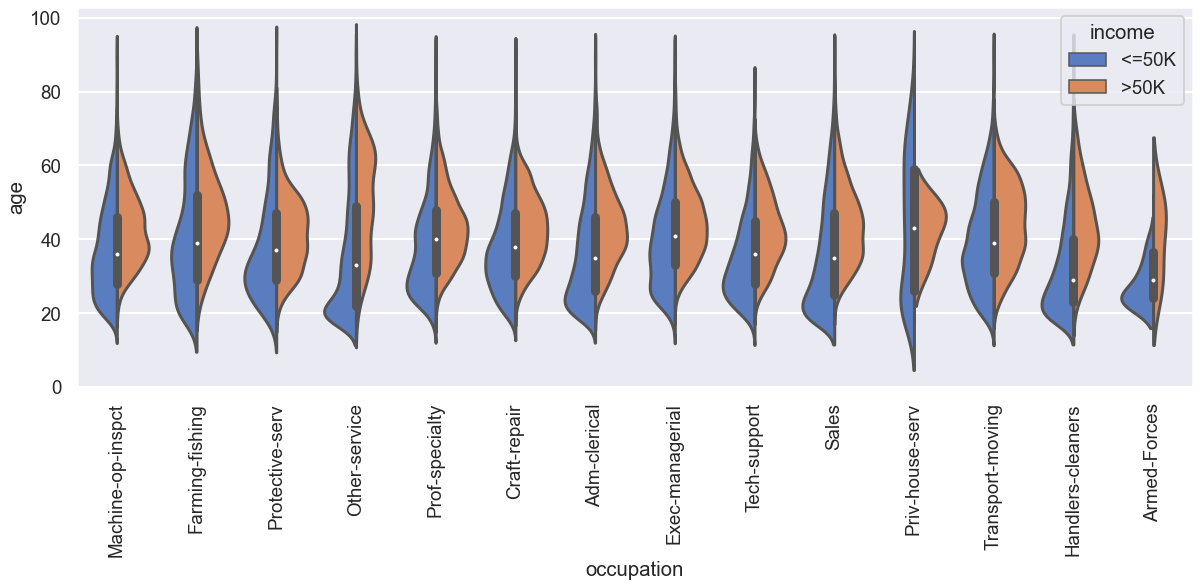

In [34]:
plt.figure(figsize = (20, 7))

# violin plot
sns.violinplot(x= 'occupation', y= 'age', hue = 'income', data = df, 
               gridsize = 100, palette = 'muted', split = True, saturation = 0.75)

# formatting x axisIncome
_ = plt.xticks(rotation = 90,
               horizontalalignment = 'center',
               fontweight = 'light')

plt.show()


#### Here we can see that in most of the jobs the there is a peak around the age of 35 to 45, where the salary is greater than 50K.

#### Armed-forces doesn't have a high job salaries.

#### There is a very high variation in private house service jobs and also here age is not a factor for the salary.

In [35]:
age_outliers = Zscore_outlier(df['age']) # getting the outliers of the age column
age_percent_99 = int(df['age'].quantile(.99)) # 99th percentile value of age column
age_percent_99

74

In [36]:
# getting the outliers of the Educational-Num column

educational_num_outliers = Zscore_outlier(df['educational-num'])
educational_num_outliers
duplicate_dict={} # a dictionary to store each of them.
for i in educational_num_outliers:#loop through them.
    duplicate_dict[i]=educational_num_outliers.count(i)
print('\n', duplicate_dict)


 {2: 247, 1: 83}


#### outlier in educational-num at lower limit only no any outlier at upper limit

In [37]:
hrs_per_week_outliers = Zscore_outlier(df['hours-per-week'])
duplicate_dict={} # a dictionary to store each of them.
for i in hrs_per_week_outliers:#loop through them.
    duplicate_dict[i]=hrs_per_week_outliers.count(i)
print('\n', duplicate_dict)



 {90: 42, 84: 72, 80: 210, 99: 137, 96: 9, 3: 59, 1: 27, 2: 53, 78: 13, 92: 3, 85: 17, 98: 14, 86: 4, 88: 4, 79: 1, 89: 3, 87: 1, 97: 2, 94: 1, 82: 1, 91: 3, 81: 3, 95: 2}


## outlier in hrs per week
#### it consist upper and lower limit outlier both like upper are 97 to 78 and lower are 1 to 5

In [38]:
percentile_15 = df['hours-per-week'].quantile(.02) # 15th percentile value of the column
percentile_95 = df['hours-per-week'].quantile(.98) # 95th percentile value of the column
print(percentile_15)
print(percentile_95)

10.0
70.0


In [39]:
# replacing the outliers in Hours-Per-Week column

hours_per_week = [] # empty list

for data in df['hours-per-week']:
    # if the value in a outlier and is less than 10
    if data in hrs_per_week_outliers and data < 10:
        hours_per_week.append(int(percentile_15))
    # if the value in a outlier and is greater than 78
    elif data in hrs_per_week_outliers and data >= 78:
        hours_per_week.append(int(percentile_95))
    # normal value
    else:
        hours_per_week.append(int(data))

In [40]:
duplicate_dict={} # a dictionary to store each of them.
for i in hours_per_week:#loop through them.
    duplicate_dict[i]=hours_per_week.count(i)
print('\n', duplicate_dict)


 {40: 22803, 50: 4246, 30: 1700, 32: 423, 10: 564, 39: 63, 35: 1937, 48: 770, 25: 958, 20: 1862, 45: 2717, 47: 82, 6: 92, 43: 227, 70: 979, 54: 62, 60: 2177, 38: 714, 36: 336, 18: 129, 24: 354, 44: 310, 56: 141, 28: 140, 16: 303, 41: 59, 22: 62, 55: 1051, 14: 55, 33: 61, 37: 242, 8: 218, 12: 247, 15: 623, 75: 105, 52: 205, 42: 338, 68: 16, 65: 355, 5: 95, 17: 42, 72: 107, 53: 39, 29: 15, 21: 46, 46: 129, 23: 40, 49: 39, 67: 6, 76: 4, 7: 45, 58: 38, 26: 40, 34: 48, 4: 84, 51: 20, 63: 15, 31: 12, 77: 9, 27: 43, 13: 28, 19: 19, 62: 23, 66: 23, 57: 19, 11: 20, 59: 7, 9: 27, 64: 22, 73: 4, 61: 4, 74: 3, 69: 1}


### This are the normal range for working hrs

In [41]:
df['age'].replace(age_outliers, age_percent_99, inplace = True)

In [42]:
update_value = df['educational-num'].quantile(.05)
df['educational-num'].replace(educational_num_outliers, update_value, inplace = True)

In [43]:
# replacing the values in the dataframe with the values in the list
df['hours-per-week'] = hours_per_week

In [44]:
c = " # "*30
for name in df.columns:
    print(f"\n {c}\n {name} value count \n {df[name].value_counts()}")


  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  # 
 age value count 
 36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
75      72
76      69
77      54
78      34
79      30
Name: age, Length: 63, dtype: int64

  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  # 
 workclass value count 
 Private             33906
Self-emp-not-inc     3862
Local-gov            3136
other                2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  # 
 fnlwgt value count 
 203488    21
190290    19
120277    19
125892    18
126569    18
          ..
82649      1
193304     1
227689     1
135891     1
250034     1
Name: fnlwgt, Length: 28523, dtype: int64

  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #

## use label encoder for categorical columns

In [45]:
from sklearn.preprocessing import LabelEncoder
df1 = df
le = LabelEncoder()
df1.income = le.fit_transform(df1.income)
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,Dropout,7.0,Unmarried,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HighSchool Graduate,9.0,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Community College,12.0,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Community College,10.0,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,other,103497,Community College,10.0,Unmarried,Other-service,Own-child,White,Female,0,0,30,United-States,0


##### here 0 == '<=50K' and 1 = ">50k" convert  using labelencoder

In [46]:
df1.gender = le.fit_transform(df1.gender)
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,Dropout,7.0,Unmarried,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0
1,38,Private,89814,HighSchool Graduate,9.0,Married,Farming-fishing,Husband,White,1,0,0,50,United-States,0
2,28,Local-gov,336951,Community College,12.0,Married,Protective-serv,Husband,White,1,0,0,40,United-States,1
3,44,Private,160323,Community College,10.0,Married,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,1
4,18,other,103497,Community College,10.0,Unmarried,Other-service,Own-child,White,0,0,0,30,United-States,0


In [47]:
df1.race = le.fit_transform(df1.race)
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,Dropout,7.0,Unmarried,Machine-op-inspct,Own-child,2,1,0,0,40,United-States,0
1,38,Private,89814,HighSchool Graduate,9.0,Married,Farming-fishing,Husband,4,1,0,0,50,United-States,0
2,28,Local-gov,336951,Community College,12.0,Married,Protective-serv,Husband,4,1,0,0,40,United-States,1
3,44,Private,160323,Community College,10.0,Married,Machine-op-inspct,Husband,2,1,7688,0,40,United-States,1
4,18,other,103497,Community College,10.0,Unmarried,Other-service,Own-child,4,0,0,0,30,United-States,0


In [48]:
df1['marital-status'] = le.fit_transform(df1['marital-status'])
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,Dropout,7.0,3,Machine-op-inspct,Own-child,2,1,0,0,40,United-States,0
1,38,Private,89814,HighSchool Graduate,9.0,1,Farming-fishing,Husband,4,1,0,0,50,United-States,0
2,28,Local-gov,336951,Community College,12.0,1,Protective-serv,Husband,4,1,0,0,40,United-States,1
3,44,Private,160323,Community College,10.0,1,Machine-op-inspct,Husband,2,1,7688,0,40,United-States,1
4,18,other,103497,Community College,10.0,3,Other-service,Own-child,4,0,0,0,30,United-States,0


In [49]:
df1['workclass'] = le.fit_transform(df1['workclass'])
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,Dropout,7.0,3,Machine-op-inspct,Own-child,2,1,0,0,40,United-States,0
1,38,3,89814,HighSchool Graduate,9.0,1,Farming-fishing,Husband,4,1,0,0,50,United-States,0
2,28,1,336951,Community College,12.0,1,Protective-serv,Husband,4,1,0,0,40,United-States,1
3,44,3,160323,Community College,10.0,1,Machine-op-inspct,Husband,2,1,7688,0,40,United-States,1
4,18,8,103497,Community College,10.0,3,Other-service,Own-child,4,0,0,0,30,United-States,0


In [50]:
df1['education'] = le.fit_transform(df1['education'])
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,3,7.0,3,Machine-op-inspct,Own-child,2,1,0,0,40,United-States,0
1,38,3,89814,4,9.0,1,Farming-fishing,Husband,4,1,0,0,50,United-States,0
2,28,1,336951,1,12.0,1,Protective-serv,Husband,4,1,0,0,40,United-States,1
3,44,3,160323,1,10.0,1,Machine-op-inspct,Husband,2,1,7688,0,40,United-States,1
4,18,8,103497,1,10.0,3,Other-service,Own-child,4,0,0,0,30,United-States,0


In [51]:
df1['occupation'] = le.fit_transform(df1['occupation'])
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,3,7.0,3,6,Own-child,2,1,0,0,40,United-States,0
1,38,3,89814,4,9.0,1,4,Husband,4,1,0,0,50,United-States,0
2,28,1,336951,1,12.0,1,10,Husband,4,1,0,0,40,United-States,1
3,44,3,160323,1,10.0,1,6,Husband,2,1,7688,0,40,United-States,1
4,18,8,103497,1,10.0,3,7,Own-child,4,0,0,0,30,United-States,0


In [52]:
df1['native-country'] = le.fit_transform(df1['native-country'])
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,3,7.0,3,6,Own-child,2,1,0,0,40,39,0
1,38,3,89814,4,9.0,1,4,Husband,4,1,0,0,50,39,0
2,28,1,336951,1,12.0,1,10,Husband,4,1,0,0,40,39,1
3,44,3,160323,1,10.0,1,6,Husband,2,1,7688,0,40,39,1
4,18,8,103497,1,10.0,3,7,Own-child,4,0,0,0,30,39,0


In [53]:
df1.drop(['relationship'],axis = 'columns',inplace = True)
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,3,7.0,3,6,2,1,0,0,40,39,0
1,38,3,89814,4,9.0,1,4,4,1,0,0,50,39,0
2,28,1,336951,1,12.0,1,10,4,1,0,0,40,39,1
3,44,3,160323,1,10.0,1,6,2,1,7688,0,40,39,1
4,18,8,103497,1,10.0,3,7,4,0,0,0,30,39,0


##### we sucessfuly convert all cetagrical data to numerical data 
##### because Machine learning model can't simulate categorical data 

In [55]:
X = df1.drop('income', axis = 1) # independent features
y = df1['income'] # depenedent feature

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state = 200)

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # object of Standard Scaler
f_X_train = scaler.fit_transform(X_train)
f_X_test = scaler.fit_transform(X_test)
f_X_test

array([[-0.18501074, -0.23655271, -1.16823155, ..., -0.21549012,
         1.25704349,  0.28808873],
       [ 1.20869509, -0.23655271,  1.78904314, ..., -0.21549012,
        -0.02280951,  0.28808873],
       [ 0.91528333,  1.02695882, -0.95674003, ..., -0.21549012,
         2.53689649,  0.28808873],
       ...,
       [-0.03830487, -0.23655271, -0.45216372, ..., -0.21549012,
        -0.02280951,  0.28808873],
       [ 0.8419304 , -0.23655271, -0.75928513, ..., -0.21549012,
         0.65977876,  0.28808873],
       [ 0.18175395, -0.23655271,  1.52410774, ..., -0.21549012,
        -0.44942718,  0.28808873]])

In [94]:
f_X_train

array([[ 2.97427723, -0.24635291,  1.35286859, ..., -0.2180125 ,
        -2.9358999 ,  0.28748606],
       [ 1.86865367,  2.89157267,  0.64036974, ..., -0.2180125 ,
        -0.19230476,  0.28748606],
       [-1.59563346, -0.24635291, -0.37518669, ..., -0.2180125 ,
        -1.73557703,  0.28748606],
       ...,
       [ 0.76303012, -0.24635291, -0.47615866, ..., -0.2180125 ,
        -0.02083007,  0.28748606],
       [-0.85855109, -0.24635291, -0.1971092 , ..., -0.2180125 ,
        -0.87820355,  0.28748606],
       [ 0.24707246,  1.63640244,  0.27352349, ..., -0.2180125 ,
        -0.36377946, -2.35544545]])

In [95]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [96]:
logi_acc_train = cross_val_score(LogisticRegression(),f_X_train, y_train)

In [97]:
logi_acc_test = cross_val_score(LogisticRegression(),f_X_test, y_test)

In [98]:
GaussianNB_acc_train = cross_val_score(GaussianNB(),f_X_train, y_train)
GaussianNB_acc_test = cross_val_score(GaussianNB(),f_X_test, y_test)

In [99]:
SVC_acc_train = cross_val_score(SVC(),f_X_train, y_train)
SVC_acc_test = cross_val_score(SVC(),f_X_test, y_test)

In [100]:
KNeighborsClassifier_acc_train = cross_val_score(KNeighborsClassifier(),f_X_train, y_train)
KNeighborsClassifier_acc_test = cross_val_score(KNeighborsClassifier(),f_X_test, y_test)

In [101]:
RandomForestClassifier_acc_train = cross_val_score(RandomForestClassifier(),f_X_train, y_train)
RandomForestClassifier_acc_test = cross_val_score(RandomForestClassifier(),f_X_test, y_test)

In [102]:
DecisionTreeClassifier_acc_train = cross_val_score(DecisionTreeClassifier(),f_X_train, y_train)
DecisionTreeClassifier_acc_test = cross_val_score(DecisionTreeClassifier(),f_X_test, y_test)

In [103]:
XGBClassifier_acc_train = cross_val_score(XGBClassifier(),f_X_train, y_train)
XGBClassifier_acc_test = cross_val_score(XGBClassifier(),f_X_test, y_test)

[00:23:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:23:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:23:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:23:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [104]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'Random Forest', 'Decision Tree', 'XGBoost'],
    'Training_Score' : [logi_acc_train.max(), GaussianNB_acc_train.max(), SVC_acc_train.max(), KNeighborsClassifier_acc_train.max(),
                       RandomForestClassifier_acc_train.max(), DecisionTreeClassifier_acc_train.max(), XGBClassifier_acc_train.max()],
    'Testing_Score' : [logi_acc_test.max(), GaussianNB_acc_test.max(), SVC_acc_test.max(), KNeighborsClassifier_acc_test.max(),
                       RandomForestClassifier_acc_test.max(), DecisionTreeClassifier_acc_test.max(), XGBClassifier_acc_test.max()]})

In [105]:
models

,Model,Training_Score,Testing_Score
0,Logistic Regression,0.832100,0.831530
1,Naive Bayes,0.802331,0.811641
2,Support Vector Machines,0.851315,0.845569
3,K - Nearest Neighbors,0.834777,0.823633
4,Random Forest,0.862026,0.861655
5,Decision Tree,0.816034,0.820123
6,XGBoost,0.873681,0.869260


# Conclusion 

## . Highest accuracy given by XGBosst
## . The all >50k salary taken by the people whose age in between 40-48
## . United state people earn more money as compaired to other country 